<a href="https://colab.research.google.com/github/devSubho51347/AI-NOTES-TAKING-APP/blob/main/Copy_of_Cleaning_and_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basics

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [4]:
df = pd.read_csv("/content/drive/MyDrive/awsmlhackathon/dataset/train.csv")

In [2]:
df.head()

NameError: ignored

In [ ]:
 df['smalltitle'] = df['info'].str.slice(0, 50)

In [ ]:
df.columns

Index(['Unnamed: 0', 'PRODUCT_ID', 'TITLE', 'BULLET_POINTS', 'DESCRIPTION',
       'PRODUCT_TYPE_ID', 'PRODUCT_LENGTH', 'info', 'smalltitle'],
      dtype='object')

1885801400.0

In [ ]:
!pip install langid
from tqdm import tqdm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 22.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langid: filename=langid-1.1.6-py3-none-any.whl size=1941187 sha256=068cbfdf8dc66c70e1b3be64354311ff4063bd1ee860bbc223c4c35aeb189730
  Stored in directory: /root/.cache/pip/wheels/93/95/a9/c292c9dd8cadb8f2359f1670ff198a40d47167b0be3236e1c8
Successfully built langid


In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 51.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 90.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 22.6 MB/s eta 0:00:00


In [ ]:
### Finding NER from title column
from transformers import AutoTokenizer, AutoModelForTokenClassification
from transformers import pipeline
tokenizer = AutoTokenizer.from_pretrained("Davlan/distilbert-base-multilingual-cased-ner-hrl")
model = AutoModelForTokenClassification.from_pretrained("Davlan/distilbert-base-multilingual-cased-ner-hrl")
nlp = pipeline("ner", model=model, tokenizer=tokenizer)
example = "Nader Jokhadar had given Syria the lead with a well-struck header in the seventh minute."
ner_results = nlp(example)
print(ner_results)


[{'entity': 'B-PER', 'score': 0.9997311, 'index': 1, 'word': 'Nad', 'start': 0, 'end': 3}, {'entity': 'I-PER', 'score': 0.99750936, 'index': 2, 'word': '##er', 'start': 3, 'end': 5}, {'entity': 'I-PER', 'score': 0.99971455, 'index': 3, 'word': 'Jo', 'start': 6, 'end': 8}, {'entity': 'I-PER', 'score': 0.99979347, 'index': 4, 'word': '##kha', 'start': 8, 'end': 11}, {'entity': 'I-PER', 'score': 0.9998343, 'index': 5, 'word': '##dar', 'start': 11, 'end': 14}, {'entity': 'B-LOC', 'score': 0.99975127, 'index': 8, 'word': 'Syria', 'start': 25, 'end': 30}]


In [ ]:
df['TITLE'].isnull().sum()

12

In [5]:
# define lambda function to check conditions and return value
combine_cols = lambda x: str(x['TITLE']) + str(x['BULLET_POINTS']) if pd.notnull(x['BULLET_POINTS']) else str(x['TITLE']) + str(x['DESCRIPTION']) if pd.notnull(x['DESCRIPTION']) else str(x['TITLE'])
# ls = df.sample(n= 200, replace=False)
# apply lambda function to create new column

df['combined'] = df.apply(combine_cols, axis=1)
# df.to_csv('latest_train.csv', index = False)

In [ ]:
# define lambda function to check conditions and return value
combine_cols = lambda x: str(x['TITLE']) + str(x['BULLET_POINTS']) if pd.notnull(x['BULLET_POINTS']) else str(x['TITLE']) + str(x['DESCRIPTION']) if pd.notnull(x['DESCRIPTION']) else str(x['TITLE'])
# ls = df.sample(n= 200, replace=False)
# apply lambda function to create new column

test_df = pd.read_csv("/content/drive/MyDrive/awsmlhackathon/dataset/test.csv")
test_df['combined'] = test_df.apply(combine_cols, axis=1)
test_df.to_csv('latest_test.csv', index = False)

In [ ]:
df['combined'].isnull().sum()

0

In [ ]:
df.to_csv('latest_train.csv', index = False)

In [ ]:
ls['new_col'].isnull().sum()

0

In [ ]:
df.columns

Index(['PRODUCT_ID', 'TITLE', 'BULLET_POINTS', 'DESCRIPTION',
       'PRODUCT_TYPE_ID', 'PRODUCT_LENGTH', 'combined'],
      dtype='object')

In [ ]:
# select 3 random rows from the dataframe
subset = df.sample(n= 200000, replace=False)

# reset the index
subset = subset.reset_index(drop=True)

In [ ]:
new_df = subset

In [ ]:
import langid
def lang(x):
  return langid.classify(x)[0]

# nw_df = df.iloc[[1000,:]] 

results = []
for index, row in tqdm(new_df[['smalltitle']].iterrows(), total=df.shape[0]):
    result = lang(str(row))
    results.append(result)


# df['lang'] = df['smalltitle'].apply(lang)

# # ('en', -54.41310358047485)

  9%|▉         | 200000/2249698 [10:01<1:42:46, 332.39it/s]


In [ ]:
len(results

200000

In [ ]:
import re


# Define a dictionary of words to match
word_dict = {'x', 'inches', 'mm' , 'cm' , 'inch'}


# Define a regular expression pattern to match numbers (including decimals) followed by a word from the dictionary
pattern = r'\b(\d+\.\d+|\d+)\s+(' + '|'.join(word_dict) + r')\b'

# Define a function to extract the matched numbers from a string
def extract_numbers(text):
    matches = re.findall(pattern, text)
    numbers = []
    for match in matches:
        numbers.append(float(match[0]))
    return numbers


number = []
for index, row in tqdm(new_df[['TITLE']].iterrows(), total=new_df.shape[0]):
    result = extract_numbers(str(row))
    number.append(result)

100%|██████████| 200000/200000 [01:10<00:00, 2847.29it/s]


In [ ]:
# new_df['lang'] = results
# new_df['number'] = number

new_df[['TITLE']].head(10)

,TITLE
0,US Polo Association Boy's Plain Regular fit T-...
1,Demokratie und Republik: Historizität und Norm...
2,Huppme Happy Birthday Leanne Inner Black Coffe...
3,Chortex Honeycomb 100% Turkish Cotton Bath Mat...
4,Les reseaux foccart - l'homme des affaires sec...
5,Die Nekropolen des 12. bis 10. Jahrhunderts
6,Circle of Trust: 2 (Genesis Circle)
7,"Nouveau Dictionnaire D'Histoire Naturelle, App..."
8,slatters be royal store Rectangular Shape Reve...
9,Oedipus Rex


In [ ]:
df.to_csv('new_train_data_01.csv')

In [ ]:

new_df['lang'].value_counts().head(20)

NameError: ignored

In [ ]:
len(results)

NameError: ignored

In [ ]:
df['PRODUCT_TYPE_ID'].value_counts()[(df['PRODUCT_TYPE_ID'].value_counts() < 10) & (df['PRODUCT_TYPE_ID'].value_counts() >= 0)].index.tolist()

In [ ]:
df['PRODUCT_TYPE_ID'].value_counts() < 5

1        False
12064    False
0        False
123      False
6104     False
         ...  
7239      True
12536     True
4114      True
3229      True
4505      True
Name: PRODUCT_TYPE_ID, Length: 12907, dtype: bool

In [ ]:
## Find all the distinct product ids
df['PRODUCT_TYPE_ID'].nunique()

12907

In [ ]:
df.shape

(2249698, 6)

<ipython-input-15-573e753c1e8c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['PRODUCT_TYPE_ID'])


<Axes: xlabel='PRODUCT_TYPE_ID', ylabel='Density'>

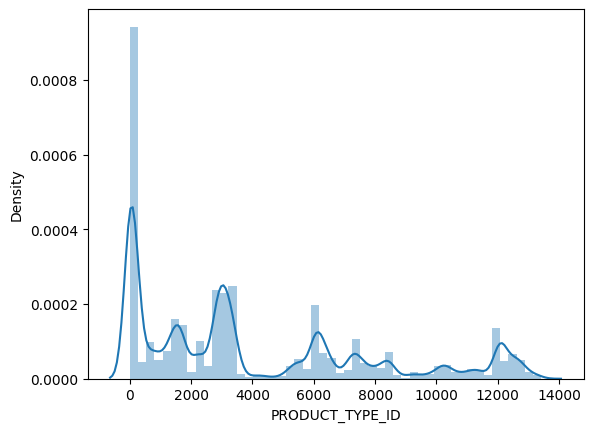

In [ ]:
sns.distplot(df['PRODUCT_TYPE_ID'])

In [ ]:
df['PRODUCT_TYPE_ID'].max()

13420

In [ ]:
df['PRODUCT_TYPE_ID'].min()

0

In [ ]:
def product_id_extruder(min,max):
  my_list = df['PRODUCT_TYPE_ID'].value_counts()[(df['PRODUCT_TYPE_ID'].value_counts() < max) & (df['PRODUCT_TYPE_ID'].value_counts() >= min)].index.tolist()

  return my_list, len(my_list)



In [ ]:
li = [(0,10),(10,100),(100,1000),(1000,10000),(10000,100000),(100000,10000000)]

for ele in li:
  arr , leng = product_id_extruder(ele[0],ele[1])

  print("Min: ",ele[0], "Max: ", ele[1])

  print("Total number of unique product category ids", leng)

  print("Product ids as a percentage of total ids", 100*leng/df['PRODUCT_TYPE_ID'].nunique())

  print("Product ids as a percentage of total data points", 100*df[df['PRODUCT_TYPE_ID'].isin(arr)].shape[0]/df.shape[0])
  print("")
  print("")
  print("")

Min:  0 Max:  10
Total number of unique product category ids 6089
Product ids as a percentage of total ids 47.17595103432246
Product ids as a percentage of total data points 0.9034101466063444



Min:  10 Max:  100
Total number of unique product category ids 4546
Product ids as a percentage of total ids 35.221197799643605
Product ids as a percentage of total data points 7.012230085993765



Min:  100 Max:  1000
Total number of unique product category ids 1906
Product ids as a percentage of total ids 14.767180599674596
Product ids as a percentage of total data points 25.545428764216354



Min:  1000 Max:  10000
Total number of unique product category ids 341
Product ids as a percentage of total ids 2.6419772216626636
Product ids as a percentage of total data points 40.59229283219348



Min:  10000 Max:  100000
Total number of unique product category ids 24
Product ids as a percentage of total ids 0.18594561090880918
Product ids as a percentage of total data points 20.559292847306615





In [ ]:
lie = df['PRODUCT_TYPE_ID'].value_counts()[(df['PRODUCT_TYPE_ID'].value_counts() < 10000000) & (df['PRODUCT_TYPE_ID'].value_counts() >= 10000)].index.tolist()
100*df[df['PRODUCT_TYPE_ID'].isin(lie)].shape[0]/df.shape[0]

25.946638170990063

In [ ]:
df.columns

Index(['PRODUCT_ID', 'TITLE', 'BULLET_POINTS', 'DESCRIPTION',
       'PRODUCT_TYPE_ID', 'PRODUCT_LENGTH'],
      dtype='object')

In [ ]:
## Finding mena and variance of particular features
df[df['PRODUCT_TYPE_ID'].isin(lie)].groupby('PRODUCT_TYPE_ID')['PRODUCT_LENGTH'].agg(
     ['min', 'max', 'mean', 'var','std']
)

In [ ]:
#Initial Hypothesis was wrong

In [ ]:
lie = df['PRODUCT_TYPE_ID'].value_counts()[(df['PRODUCT_TYPE_ID'].value_counts() < 100) & (df['PRODUCT_TYPE_ID'].value_counts() >= 0)].index.tolist()
100*df[df['PRODUCT_TYPE_ID'].isin(lie)].shape[0]/df.shape[0]

## Finding mena and variance of particular features
new_df = df[df['PRODUCT_TYPE_ID'].isin(lie)].groupby('PRODUCT_TYPE_ID')['PRODUCT_LENGTH'].agg(
     ['min', 'max', 'mean', 'var','std']
)

new_df[new_df['std'] > 100].shape

(8079, 5)

In [ ]:
## Finding mena and variance of particular features
df[df['PRODUCT_TYPE_ID'].isin(lie)].groupby('PRODUCT_TYPE_ID')[['PRODUCT_LENGTH']].var()

In [ ]:
## Finding mena and variance of particular features
df[df['PRODUCT_TYPE_ID'].isin(lie)].groupby('PRODUCT_TYPE_ID')['PRODUCT_LENGTH'].max()

## Finding mena and variance of particular features
df[df['PRODUCT_TYPE_ID'].isin(lie)].groupby('PRODUCT_TYPE_ID')['PRODUCT_LENGTH'].min()

In [ ]:
## So my hypothesis of finding product length from product category id was absolutely wrong

# Basic Text Processing

In [ ]:
!pip install sklearn -q

!pip install spacy -q

!python -m spacy download en_core_web_sm

!pip install gensim

  Preparing metadata (setup.py) ... done
2023-04-22 15:30:09.357080: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 69.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
import nltk
import string 
import spacy

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from gensim.models import Word2Vec
nlp = spacy.load("en_core_web_sm")

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
german_stop_words = set(stopwords.words('german'))
french_stop_words = set(stopwords.words('french'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
type(stop_words)

set

In [ ]:
stop_words = stop_words | german_stop_words | french_stop_words 

In [ ]:
punctuations = string.punctuation
punctuations = set(punctuations)

In [ ]:
# Creating our tokenizer function
def spacy_tokenizer(sentence):
    # Creating our token object, which is used to create documents with linguistic annotations.
    doc = nlp(sentence)



    # print(doc)
    # print(type(doc))

    # # Lemmatizing each token and converting each token into lowercase
    # mytokens = [ word.lemma_.lower().strip() for word in doc ]

    # # print(mytokens)

    # # Removing stop words
    mytokens = [ str(word) for word in doc if word not in stop_words and word not in punctuations ]

    # return preprocessed list of tokens
    return " ".join(mytokens)

In [ ]:
doc = nlp("Tales of Cydonia: Volume Two: Cydonia")
type(doc)
mytokens = [ word for word in doc if word not in stop_words and word not in punctuations ]

'[ T a l e s ,   o f ,   C y d o n i a ,   : ,   V o l u m e ,   T w o ,   : ,   C y d o n i a ]'

In [ ]:
ss = df[['TITLE']].iloc[100:]
ss.head()

,TITLE
100,Tales of Cydonia: Volume Two: Cydonia Labyrint...
101,Protective Case Compatible with MacBook Air 11...
102,Paul Clifford: 3
103,Live Green Flower Bulbs |Tulip Multicolour Dou...
104,Trendy World Colorblock Round Neck Casual Boys...


In [ ]:
ss['modified'] = ss['TITLE'].apply(spacy_tokenizer)

KeyboardInterrupt: ignored

In [ ]:
ss

'artzfolio tulip flowers blackout curtain door window room eyelets tie back canvas fabric width 4.5feet 54inch height 5 foot 60 inch set 2 pcs'

In [ ]:
df = pd.read_csv('/content/latest_train.csv')

In [9]:
new_df = df

In [10]:
new_df['TITLE'].isnull().sum()

12

In [ ]:
new_df.columns

Index(['PRODUCT_ID', 'TITLE', 'BULLET_POINTS', 'DESCRIPTION',
       'PRODUCT_TYPE_ID', 'PRODUCT_LENGTH', 'combined'],
      dtype='object')

In [11]:
new_dff = new_df[['TITLE','combined','PRODUCT_LENGTH']]

In [ ]:
new_dff.head()

,TITLE,combined,PRODUCT_LENGTH
0,ArtzFolio Tulip Flowers Blackout Curtain for D...,ArtzFolio Tulip Flowers Blackout Curtain for D...,2125.980000
1,Marks & Spencer Girls' Pyjama Sets T86_2561C_N...,Marks & Spencer Girls' Pyjama Sets T86_2561C_N...,393.700000
2,PRIKNIK Horn Red Electric Air Horn Compressor ...,PRIKNIK Horn Red Electric Air Horn Compressor ...,748.031495
3,ALISHAH Women's Cotton Ankle Length Leggings C...,ALISHAH Women's Cotton Ankle Length Leggings C...,787.401574
4,The United Empire Loyalists: A Chronicle of th...,The United Empire Loyalists: A Chronicle of th...,598.424000


In [12]:
new_dff.shape

(2249698, 3)

In [13]:
new_dff.dropna(inplace = True)

<ipython-input-13-a7adbb84e706>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_dff.dropna(inplace = True)


In [14]:
new_dff.isnull().sum()

TITLE             0
combined          0
PRODUCT_LENGTH    0
dtype: int64

In [15]:
new_dff["PRODUCT_LENGTH"] = new_dff["PRODUCT_LENGTH"].round(3)

<ipython-input-15-c792c4456929>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_dff["PRODUCT_LENGTH"] = new_dff["PRODUCT_LENGTH"].round(3)


In [16]:
new_dff['log_label'] = np.log(new_dff["PRODUCT_LENGTH"])
new_dff['sqrt_label'] = np.sqrt(new_dff["PRODUCT_LENGTH"])

<ipython-input-16-89aff653b18b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_dff['log_label'] = np.log(new_dff["PRODUCT_LENGTH"])
<ipython-input-16-89aff653b18b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_dff['sqrt_label'] = np.sqrt(new_dff["PRODUCT_LENGTH"])


In [17]:
from sklearn.model_selection import train_test_split

In [69]:
x_train, x_test, y_train, y_test = train_test_split(new_dff["TITLE"],new_dff["log_label"], test_size = 0.1,random_state = 5)

In [32]:
def transform_train_test_data(train, test, vectorizer):
    x_train = vectorizer.fit_transform(train)
    x_test = vectorizer.transform(test)
    return x_train, x_test

In [72]:
tf_idf = TfidfVectorizer(max_features=110000)
x_train_tfidf, x_test_tfidf = transform_train_test_data(x_train,x_test, tf_idf)

In [ ]:
import pickle

In [ ]:
with open('tfidf.pkl', 'wb') as f:
    pickle.dump(tf_idf, f)   

In [43]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [44]:
def model_score(classifier,x_test_vectors):
    predicted = classifier.predict(x_test_vectors)
    print("MSE:",mean_squared_error(y_test, predicted))
    print("MAE:",mean_absolute_error(y_test, predicted))
    print("r2:",r2_score(y_test, predicted))

In [71]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge

In [39]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [40]:
classifier_tfidf = GradientBoostingRegressor(learning_rate = 0.1, max_depth = 3)
classifier_tfidf.fit(x_train_tfidf, y_train)
model_score(classifier_tfidf,x_test_tfidf)

KeyboardInterrupt: ignored

In [58]:
x_train

690029                             Sex and Death in Sigatoka
1948382    Boys School Uniform Distressed Silver Flip Top...
1546496    Kolorr Multipurpose Stitch Baskets Home / Kitc...
629142     Philosophical Hermeneutics and the Nightmare o...
1343733    THE HAND OF THE SUN KING: An exquisite epic fa...
                                 ...                        
558092     60 Wunderschöne Mandalas: Entspannen, Stress a...
1956993                   GE WB30K10018 Coil Surface Element
1173187    Su-mix BUTSLVSA21 750-Watt Mixer Grinder with ...
2115802    Lucario 2PC Universal Wrench Set, Metric & SAE...
1346409    Atomizer Sprayer Nano Sprayer Gun Portable Ele...
Name: TITLE, Length: 1912233, dtype: object

In [73]:
# classifier_tfidf = Lasso(alpha = 0.1)
classifier_tfidf = Ridge(alpha = 0.1)
classifier_tfidf.fit(x_train_tfidf, y_train)
model_score(classifier_tfidf,x_test_tfidf)

MSE: 0.5796574617788919
MAE: 0.45957671333896133
r2: 0.39728863608055487


In [ ]:
import pickle

# Testing

In [6]:
test_df = pd.read_csv("/content/drive/MyDrive/awsmlhackathon/test_final.csv")

In [74]:
test_dff = test_df.copy()

In [75]:
def create_final_df(df):
  df = df
  df.drop(columns = ['BULLET_POINTS', 'DESCRIPTION',
       'PRODUCT_TYPE_ID'], axis = 0, inplace = True)
  df["TITLE"].fillna('empty', inplace = True)

  data_test = tf_idf.transform(df['TITLE'])

  # df.drop(columns = ["TITLE"], axis = 0, inplace = True)

  # df["combined"].fillna('empty', inplace = True)

  # data_test = tf_idf.transform(df['combined'])

  output = classifier_tfidf.predict(data_test)
  output = np.array(output)
  org_output = np.exp(output)

  return org_output
  




In [76]:
import random
def final(df,arr):
  df["PRODUCT_LENGTH"] = arr
  df.drop(columns = ['TITLE','combined'], axis = 0, inplace = True)
  # df.drop(columns = [ 'combined'], axis = 0, inplace = True)
  var = np.random.randint(1,100)
  print(var)
  df.to_csv(f'data{var}.csv', index = False)




In [65]:
test_dff.head()

,PRODUCT_ID,TITLE,BULLET_POINTS,DESCRIPTION,PRODUCT_TYPE_ID,combined
0,604373,Manuel d'Héliogravure Et de Photogravure En Re...,NaN,NaN,6142,Manuel d'Héliogravure Et de Photogravure En Re...
1,1729783,DCGARING Microfiber Throw Blanket Warm Fuzzy P...,[QUALITY GUARANTEED: Luxury cozy plush polyest...,<b>DCGARING Throw Blanket</b><br><br> <b>Size ...,1622,DCGARING Microfiber Throw Blanket Warm Fuzzy P...
2,1871949,I-Match Auto Parts Front License Plate Bracket...,"[Front License Plate Bracket Made Of Plastic,D...",Replacement for The Following Vehicles:2020 LE...,7540,I-Match Auto Parts Front License Plate Bracket...
3,1107571,PinMart Gold Plated Excellence in Service 1 Ye...,[Available as a single item or bulk packed. Se...,Our Excellence in Service Lapel Pins feature a...,12442,PinMart Gold Plated Excellence in Service 1 Ye...
4,624253,"Visual Mathematics, Illustrated by the TI-92 a...",NaN,NaN,6318,"Visual Mathematics, Illustrated by the TI-92 a..."


In [77]:
arr = create_final_df(test_dff)
final(test_dff,arr)

91


In [ ]:
var = np.random.randint(1,100)
test_df.to_csv(f'data{var}.csv', index = False)


In [ ]:
test_dff.drop(columns = ['combined'], axis = 0, inplace = True)
test_dff.to_csv('jaishreeram.csv', index = False)

<ipython-input-38-1a371212d687>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test_dff["PRODUCT_LENGTH"])


<Axes: xlabel='PRODUCT_LENGTH', ylabel='Density'>

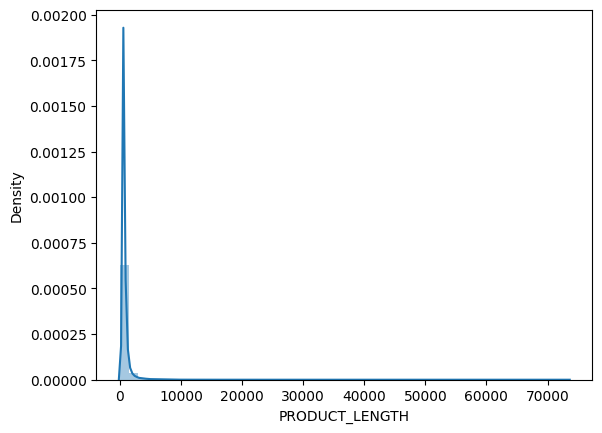

In [38]:
import seaborn as sns
sns.distplot(test_dff["PRODUCT_LENGTH"])

<ipython-input-106-0a236412a38f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['PRODUCT_LENGTH'])


<Axes: xlabel='PRODUCT_LENGTH', ylabel='Density'>

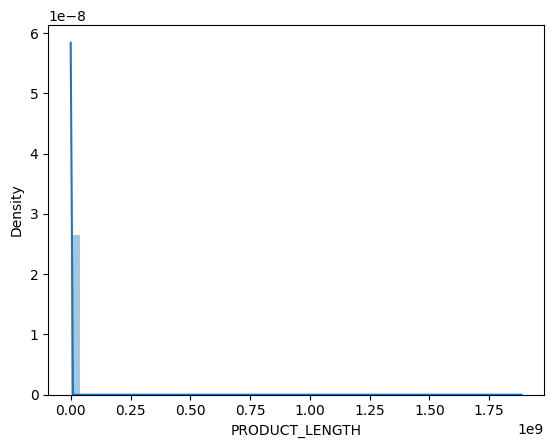

In [ ]:
sns.distplot(df['PRODUCT_LENGTH'])

In [ ]:
ddd = tf_idf.transform(new_dff)

In [ ]:
output = classifier_tfidf.predict(data_test)

In [ ]:
output 

array([-3188.77212176,  1524.33972297,  -613.77565654, ...,
       -1243.88465592, -4677.51989115, -4505.47178968])

In [ ]:
test_df["TITLE"].fillna('empty', inplace = True)
test_df.isnull().sum()

PRODUCT_ID              0
TITLE                   0
BULLET_POINTS      275922
DESCRIPTION        380001
PRODUCT_TYPE_ID         0
dtype: int64

In [ ]:
test_df.columns

Index(['PRODUCT_ID', 'TITLE', 'BULLET_POINTS', 'DESCRIPTION',
       'PRODUCT_TYPE_ID', 'PRODUCT_LENGTH'],
      dtype='object')

In [ ]:
data_test = tf_idf.transform(test_df['TITLE'])

In [ ]:
output = classifier_tfidf.predict(data_test)

In [ ]:
test_df["PRODUCT_LENGTH"] = output

In [ ]:
test_df[test_df['PRODUCT_LENGTH'] < 0]['PRODUCT_LENGTH'] = 400.00

<ipython-input-62-36a8a17aab39>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df[test_df['PRODUCT_LENGTH'] < 0]['PRODUCT_LENGTH'] = 400.00


In [ ]:
test_df['PRODUCT_LENGTH'] = test_df[['PRODUCT_LENGTH']].applymap(lambda x: 400 if x < 0 else x)

In [ ]:
test_df.head()

,PRODUCT_ID,TITLE,BULLET_POINTS,DESCRIPTION,PRODUCT_TYPE_ID,PRODUCT_LENGTH
0,604373,Manuel d'Héliogravure Et de Photogravure En Re...,NaN,NaN,6142,400.000000
1,1729783,DCGARING Microfiber Throw Blanket Warm Fuzzy P...,[QUALITY GUARANTEED: Luxury cozy plush polyest...,<b>DCGARING Throw Blanket</b><br><br> <b>Size ...,1622,1524.339723
2,1871949,I-Match Auto Parts Front License Plate Bracket...,"[Front License Plate Bracket Made Of Plastic,D...",Replacement for The Following Vehicles:2020 LE...,7540,400.000000
3,1107571,PinMart Gold Plated Excellence in Service 1 Ye...,[Available as a single item or bulk packed. Se...,Our Excellence in Service Lapel Pins feature a...,12442,8554.385647
4,624253,"Visual Mathematics, Illustrated by the TI-92 a...",NaN,NaN,6318,400.000000


In [ ]:
test_df.columns

Index(['PRODUCT_ID', 'prediction', 'PRODUCT_LENGTH'], dtype='object')

In [ ]:
test_df.drop(columns = [ 'TITLE', 'BULLET_POINTS', 'DESCRIPTION',
       'PRODUCT_TYPE_ID'], axis = 0, inplace = True)

In [ ]:
test_df.head()

,PRODUCT_ID,PRODUCT_LENGTH
0,604373,400.000000
1,1729783,1524.339723
2,1871949,400.000000
3,1107571,8554.385647
4,624253,400.000000


In [ ]:
test_df.to_csv('tfidf_linear_regressor.csv',index = False)

In [ ]:
with open('tfidf_data_test.pkl', 'wb') as f:
    pickle.dump(data_test, f)  

In [ ]:
with open('/content/tfidf.pkl', "rb") as f:
    tfidfs = pickle.load(f)


with open('/content/tfidf_xtest.pkl', "rb") as f:
    tfidf_xtest = pickle.load(f)


with open('/content/tfidf_xtrain.pkl', "rb") as f:
    tfidf_xtrain = pickle.load(f)    


In [ ]:
import pandas as pd

tfidf_xtrain = pd.read_pickle(r'/content/tfidf_xtrain.pkl')

tfidf_xtest = pd.read_pickle(r'/content/tfidf_xtest.pkl')

tfidf = pd.read_pickle(r'/content/tfidf.pkl')

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 54.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 87.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 22.1 MB/s eta 0:00:00


# Training Using Bert

In [19]:
x_train_mod = np.array(x_train)

In [20]:
x_test_mod = np.array(x_test)

y_train_mod = np.array(y_train)

y_test_mod = np.array(y_test)

In [21]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from sklearn.metrics import mean_squared_error

# Load the pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=1)

# Define the optimizer and learning rate
optimizer = AdamW(model.parameters(), lr=5e-5)

# Define a function to fine-tune the BERT model on a regression task
def train(model, optimizer, tokenizer, texts, labels, batch_size=32, epochs=10):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model.to(device)
    model.train()
    for epoch in range(epochs):
        for i in range(0, len(texts), batch_size):
            batch_texts = texts[i:i+batch_size]
            batch_labels = labels[i:i+batch_size]
            encoded = tokenizer(batch_texts, padding=True, truncation=True, return_tensors='pt')
            inputs = {k: v.to(device) for k, v in encoded.items()}
            labels_tensor = torch.tensor(batch_labels, dtype=torch.float).unsqueeze(1).to(device)
            outputs = model(**inputs, labels=labels_tensor)
            loss = outputs.loss
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        predictions = predict(model, tokenizer, texts, batch_size)
        mse = mean_squared_error(labels, predictions)
        print(f'Epoch {epoch+1} MSE: {mse:.4f}')

# Define a function to make predictions with the BERT model
def predict(model, tokenizer, texts, batch_size=32):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model.to(device)
    model.eval()
    predictions = []
    with torch.no_grad():
        for i in range(0, len(texts), batch_size):
            batch_texts = texts[i:i+batch_size]
            encoded = tokenizer(batch_texts, padding=True, truncation=True, return_tensors='pt')
            inputs = {k: v.to(device) for k, v in encoded.items()}
            outputs = model(**inputs)
            logits = outputs.logits.detach().cpu().numpy().flatten()
            predictions.extend(logits)
    return predictions


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [27]:
li = []
for ele in test_data[:100]:
  li.append(ele)

In [82]:
len(x_train_mod)

1799748

In [28]:
new_li = []
for ele in x_train_mod:
  new_li.append(ele)

In [30]:
import numpy as np
import pandas as pd

# # Create some sample data
texts = new_li
labels = y_train_mod

# # Fine-tune the BERT model on the sample data
train(model, optimizer, tokenizer, texts, labels, batch_size=32, epochs= 10)

# Make predictions with the BERT model

print(test_texts)
predictions = predict(model, tokenizer, li, batch_size=20)

# Print the predictions
print(predictions)


KeyboardInterrupt: ignored

In [80]:
lis = np.exp(predictions)

In [81]:
lis

array([1.0434047 , 1.1411557 , 1.3049928 , 1.16543   , 1.2424581 ,
       1.2332009 , 1.1157333 , 1.1323117 , 1.0701569 , 1.1678916 ,
       1.2032754 , 1.1855377 , 1.0805027 , 1.1662488 , 1.1261518 ,
       1.3201654 , 1.1952587 , 1.1290972 , 0.8639016 , 1.1073437 ,
       1.2833529 , 0.99108464, 1.1614869 , 1.1284463 , 1.2985394 ,
       1.1670299 , 1.1482352 , 1.2355444 , 1.1170355 , 1.2189564 ,
       1.1477121 , 1.1303557 , 1.0785007 , 1.0910438 , 1.0255446 ,
       1.1703765 , 1.1787323 , 1.2127374 , 1.2888833 , 1.2066323 ,
       1.1361876 , 0.9380955 , 1.1644611 , 0.944883  , 1.2186838 ,
       1.1893531 , 1.1675574 , 1.2859929 , 1.2900028 , 1.0550476 ,
       1.0435952 , 1.0670822 , 1.1617548 , 1.0334713 , 1.3124275 ,
       1.1507959 , 1.0704466 , 1.0478294 , 1.068955  , 0.9532389 ,
       1.168534  , 1.0329994 , 1.1872631 , 1.1029137 , 1.2748497 ,
       1.1594342 , 1.2780871 , 1.0365049 , 1.0636407 , 1.0534004 ,
       1.2045956 , 1.0834327 , 1.2185225 , 1.2060157 , 0.99044

In [72]:
x_train_mod

array(["STEVEN by Steve Madden Women's Voomme-s Dress Sandal, Tan Nubuck, 7 M US",
       'Without Reservations: How a Family Root Beer Stand Grew into a Global Hotel Company',
       'SEVEN DIALS Womens Maj Suede Almond Toe Ankle Fashion Boots, Black, Size 7.0',
       ...,
       'Su-mix BUTSLVSA21 750-Watt Mixer Grinder with 2 Jars (1 Wet Jar and 1 Chutney Jar) - Silver.Make in India(ISI Certified)',
       'Lucario 2PC Universal Wrench Set, Metric & SAE, Drop Forged Wrench, 5-11mm&11-15mm, 5-15mm-15-27mm,Wrench for Multiple Sizes Nuts',
       'Atomizer Sprayer Nano Sprayer Gun Portable Electric Spray Machine'],
      dtype=object)

In [23]:
test_dff.drop(columns = ['BULLET_POINTS', 'DESCRIPTION',
       'PRODUCT_TYPE_ID'], axis = 0, inplace = True)
test_dff["TITLE"].fillna('empty', inplace = True)

In [24]:
test_dff.isnull().sum()

PRODUCT_ID    0
TITLE         0
combined      3
dtype: int64

In [25]:
test_dff['TITLE'] = test_dff['TITLE'].astype(str)

In [26]:
test_data = np.array(test_dff['TITLE'])

In [70]:
li = []
li.append(test_data[0])
li

["Manuel d'Héliogravure Et de Photogravure En Relief (Éd.1890) (Savoirs Et Traditions)"]



```
# This is formatted as code
```

# Model Trainings

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# # load the Boston housing dataset
# boston = load_boston()
# X = pd.DataFrame(boston.data, columns=boston.feature_names)
# y = pd.DataFrame(boston.target, columns=['MEDV'])

# # split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create a dictionary of hyperparameters to test for each model
param_grid = {
    'linear': {'fit_intercept': [True, False]},
    'ridge': {'alpha': np.logspace(-5, 2, 8)},
    'lasso': {'alpha': np.logspace(-5, 2, 8)},
    'elasticnet': {'alpha': np.logspace(-5, 2, 8), 'l1_ratio': np.linspace(0, 1, 5)},
    'randomforest': {'n_estimators': [10, 50, 100], 'max_depth': [None, 5, 10]},
    'gradientboost': {'n_estimators': [10, 50, 100], 'max_depth': [None, 5, 10]}
}

# create a list of models to test
models = {
    'linear': LinearRegression(),
    'ridge': Ridge(),
    'lasso': Lasso(),
    'elasticnet': ElasticNet(),
    'randomforest': RandomForestRegressor(),
    'gradientboost': GradientBoostingRegressor()
}

# perform grid search cross-validation on each model
for name, model in models.items():
    param_options = param_grid[name]
    search = GridSearchCV(model, param_options, scoring='neg_mean_squared_error', cv=5)
    search.fit(x_train_tfidf, y_train)
    y_pred = search.predict(x_test_tfidf)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(name.upper())
    print('Best Parameters:', search.best_params_)
    print('Test MSE:', mse)
    print('Test R^2:', r2)

# # perform randomized search cross-validation on each model
# for name, model in models.items():
#     param_options = param_grid[name]
#     search = RandomizedSearchCV(model, param_options, n_iter=10, scoring='neg_mean_squared_error', cv=5)
#     search.fit(X_train, y_train)
#     y_pred = search.predict(X_test)
#     mse = mean_squared_error(y_test, y_pred)
#     r2 = r2_score(y_test, y_pred)
#     print(name.upper())
#     print('Best Parameters:', search.best_params_)
#     print('Test MSE:', mse)
#     print('Test R^2:', r2)


LINEAR
Best Parameters: {'fit_intercept': True}
Test MSE: 0.6776034639781628
Test R^2: 0.2921305978288913
RIDGE
Best Parameters: {'alpha': 1.0}
Test MSE: 0.6775806772795356
Test R^2: 0.29215440232162515


# Training deberta on title feature

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import torch
import pandas as pd
from sklearn.model_selection import train_test_split
from transformers import DebertaTokenizerFast, DebertaForSequenceClassification, Trainer, TrainingArguments, DataCollatorWithPadding, TFTrainer, TFTrainingArguments

In [ ]:
from tqdm.auto import tqdm

In [ ]:
df.columns

Index(['PRODUCT_ID', 'TITLE', 'BULLET_POINTS', 'DESCRIPTION',
       'PRODUCT_TYPE_ID', 'PRODUCT_LENGTH'],
      dtype='object')

In [ ]:
df_title = df[["TITLE",'PRODUCT_LENGTH']]

In [ ]:
df_title.head()

,TITLE,PRODUCT_LENGTH
0,ArtzFolio Tulip Flowers Blackout Curtain for D...,2125.980000
1,Marks & Spencer Girls' Pyjama Sets T86_2561C_N...,393.700000
2,PRIKNIK Horn Red Electric Air Horn Compressor ...,748.031495
3,ALISHAH Women's Cotton Ankle Length Leggings C...,787.401574
4,The United Empire Loyalists: A Chronicle of th...,598.424000


In [ ]:
train_df, val_df = train_test_split(df_title, test_size=0.25, random_state= 42)


train_df = train_df.dropna()
val_df = val_df.dropna()

In [ ]:
# Initialize the tokenizer and encode the training and validation sets
tokenizer = DebertaTokenizerFast.from_pretrained('microsoft/deberta-base',add_prefix_space=True)
# train_encodings = tokenizer(train_df['TITLE'].tolist(), truncation=True, padding=True,progress_callback=tqdm.write)
# val_encodings = tokenizer(val_df['TITLE'].tolist(), truncation=True, padding=True,progress_callback=tqdm.write)

In [ ]:
val_df['TITLE'].isnull().sum()

0

In [ ]:
train_df["TITLE"].fillna('', inplace=True)
val_df["TITLE"].fillna('', inplace=True)

In [ ]:
train_df['TITLE']

In [ ]:
ddd = val_df[["TITLE"]][0:5:1]

In [ ]:
val_encodings = []
for text in tqdm(val_df['TITLE'].tolist(), desc="Encoding val data"):
    encoding = tokenizer(text, truncation=True, padding=True, return_tensors='pt', max_length=512, add_special_tokens=True)
    val_encodings.append(encoding)

Encoding val data:   0%|          | 0/562425 [00:00<?, ?it/s]

In [ ]:
len(val_encodings)

562425

In [ ]:
train_encodings = []
for text in tqdm(train_df['TITLE'].tolist(), desc="Encoding train data"):
    encoding = tokenizer(text, truncation=True, padding=True, return_tensors='pt', max_length=512, add_special_tokens=True)
    train_encodings.append(encoding)

Encoding train data:   0%|          | 0/1687273 [00:00<?, ?it/s]

In [ ]:
val_encodings[0].data

{'input_ids': tensor([[    1, 15117,  1397,  8590, 22636,   241,   189,   102,  4013,    12,
          32701,     2]]),
 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]),
 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}

In [ ]:
up_train_encodings = []
for text in tqdm(train_df['TITLE'].tolist(), desc="Encoding val data"):
    encoding = tokenizer.encode_plus(text, truncation=True, padding=True, return_tensors='pt', max_length=512, add_special_tokens=True)
    up_train_encodings.append(encoding.data)

Encoding val data:   0%|          | 0/1687273 [00:00<?, ?it/s]

In [ ]:
up_val_encodings = []
for text in tqdm(val_df['TITLE'].tolist(), desc="Encoding val data"):
    encoding = tokenizer.encode_plus(text, truncation=True, padding=True, return_tensors='pt', max_length=512, add_special_tokens=True)
    up_val_encodings.append(encoding.data)

In [ ]:
td = train_df['TITLE'].astype(str).values.tolist()

In [ ]:
train_encodings = tokenizer(td, truncation=True, padding=True,is_split_into_words=True, return_tensors='pt', max_length=512)

In [ ]:
vd = val_df['TITLE'].astype(str).values.tolist()

In [ ]:
val_encodings = tokenizer(vd, truncation=True, padding=True,is_split_into_words=True, return_tensors='pt', max_length=512, add_special_tokens=True)

In [ ]:
gg

{'input_ids': tensor([[    1, 15117,  1397,  8590, 22636,   241,   189,   102,  4013,    12,
         32701,     2,   597, 15664,  4075, 21479,     2]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}

In [ ]:
encoding_tensor = []
for ele in vl_encodings:
  encoding_tensor.append(torch.stack(list(ele.values())))

In [ ]:
encoding_tensor[4]

tensor([[[    1, 45065,   870, 41701,  7438,     6,   155,  2586, 12603,    36,
          45065,     8,  8136, 34337,    43,     2,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0]],

        [[    0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0]],

        [[    1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
              1,     1,     1,     1,     1,     1,     0,     0,     0,     0,
              0,     0,     0,     0,     0,    

In [ ]:
encoding_tensor[3]

tensor([[[    1,   698,  1178,   541, 28729, 27897, 18337,  3132,  5302,   368,
          21515, 37280,    19, 22575,  6208, 45301,     6, 18357,   424,  1785,
           3727,   154,     6,   359, 29575,     2,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0]],

        [[    0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0]],

        [[    1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
              1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
              1,     1,     1,     1,     1,    

In [ ]:
encoding_tensor[1]

tensor([[[    1,   597, 15664,  4075, 21479,     2,     0,     0,     0,     0,
              0,     0]],

        [[    0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0]],

        [[    1,     1,     1,     1,     1,     1,     0,     0,     0,     0,
              0,     0]]])

In [ ]:
# Make sure all tensors have the same size along the other dimensions
max_len = max([tensor.shape[2] for tensor in encoding_tensor])
print(max_len)
for i in range(0,len(encoding_tensor)):
    padding = torch.zeros((3,1, max_len - encoding_tensor[i].shape[2]), dtype=torch.long)
    print(padding.shape)
    encoding_tensor[i] = torch.cat((encoding_tensor[i], padding), dim=2)

49
torch.Size([3, 1, 37])
torch.Size([3, 1, 43])
torch.Size([3, 1, 0])
torch.Size([3, 1, 23])
torch.Size([3, 1, 33])


In [ ]:
vall_encodings = torch.cat(encoding_tensor, dim=0)

In [ ]:
vall_encodings

In [ ]:
val_df['PRODUCT_LENGTH'].isnull().sum()

0

In [ ]:
# Convert the labels to tensors
train_label = torch.tensor(train_df['PRODUCT_LENGTH'].tolist(), dtype=torch.float)
val_labels = torch.tensor(val_df['PRODUCT_LENGTH'].tolist(), dtype=torch.float)

In [ ]:
# nnn = tf.reshape(train_label,[1,1687261])
nnn.shape

TensorShape([1, 1687261])

In [ ]:
y_test = tf.reshape(val_labels,[1,562425])
y_test.shape

TensorShape([1, 562425])

In [ ]:
val_labels.shape

torch.Size([562425])

In [ ]:
train_encodings

In [ ]:
y_train = train_df['PRODUCT_LENGTH'].tolist()
y_test = val_df['PRODUCT_LENGTH'].tolist()

In [ ]:
import tensorflow as tf

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices(
    (
        dict(train_encodings),
     nnn
    )
)

test_dataset = tf.data.Dataset.from_tensor_slices(
    (
        dict(val_encodings),
     y_test
    )
)

In [ ]:
from transformers import DataCollatorWithPadding

data_collator = DataCollatorWithPadding(tokenizer=tokenizer, return_tensors="tf")

In [ ]:
id2label = {ele:ele for ele in df["PRODUCT_LENGTH"].tolist()}
label2id = {ele:ele for ele in df["PRODUCT_LENGTH"].tolist()}

In [ ]:
# Initialize the DeBERTa model and trainer
# model1 = DebertaForSequenceClassification.from_pretrained('microsoft/deberta-base', num_labels=1)
training_args = TrainingArguments(
    output_dir='./result/cp.ckpt',
    num_train_epochs=5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=64,
    warmup_steps=500,
    weight_decay=0.01,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    logging_dir='./logs',
    logging_steps=10,
    
)

In [ ]:
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [ ]:
train_encodings['label'] = train_df["PRODUCT_LENGTH"].tolist()
val_encodings['label'] = val_df["PRODUCT_LENGTH"].tolist()

In [ ]:
trainer_model = DebertaForSequenceClassification.from_pretrained('microsoft/deberta-base',id2label = id2label, label2id = label2id)

# trainer2 = Trainer(
#     model= trainer_model,
#     args=training_args,
#     train_dataset=train_dataset,
#     eval_dataset= test_dataset,
#     tokenizer=tokenizer,
#     data_collator=data_collator,
#   )


trainer2 = Trainer(
    model= trainer_model,
    args=training_args,
    train_dataset=train_encodings,
    eval_dataset= val_encodings,
  
 
)

Some weights of the model checkpoint at microsoft/deberta-base were not used when initializing DebertaForSequenceClassification: ['lm_predictions.lm_head.dense.bias', 'lm_predictions.lm_head.dense.weight', 'lm_predictions.lm_head.LayerNorm.weight', 'lm_predictions.lm_head.LayerNorm.bias', 'lm_predictions.lm_head.bias']
- This IS expected if you are initializing DebertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DebertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DebertaForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-base and are newly initialized: ['classifier.bias', 'classifier

In [ ]:
trainer2.train()

IndexError: ignored

In [ ]:
train_encodings.keys

In [ ]:
# Train the model with progress bar
progress_bar = tqdm(range(training_args.num_train_epochs), desc="Epoch")
for epoch in progress_bar:
    trainer2.train()
    progress_bar.set_description(f"Epoch {epoch+1}")

Epoch:   0%|          | 0/5 [00:00<?, ?it/s]

ValueError: ignored

In [ ]:
import os

In [ ]:
cpath = './training_1/cp.ckpt'
cp_dir = os.path.dirname(cpath)


cp_callback = tf.keras.callbacks.ModelCheckpoint(cpath, save_weights_only = True,verbose = 1)



# # Define an optimizer
# optimizer = tf.keras.optimizers.Adam()

# checkpoint = tf.train.Checkpoint(model=model1, optimizer=optimizer)

# # Train the model and optimizer

# # Save the model and optimizer
# checkpoint.save('my_checkpoint')

# # Load the model and optimizer
# checkpoint.restore('my_checkpoint')

In [ ]:
trainer2.train()

ValueError: ignored

In [ ]:
range(training_args.num_train_epochs)

range(0, 5)

In [ ]:
for epoch in tqdm(range(0, 5)):
  print(epoch)

  0%|          | 0/5 [00:00<?, ?it/s]

0
1
2
3
4
